# Python Assignment by Syed Adeel Abdullah

In [40]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

read the csv file 

In [41]:
df=pandas.read_csv("E:/DIH/python assg1 dataset/Updated Dataset/Dataset/chronic_kidney_disease_updated.csv")

print column names.

In [42]:
print(list(df) )

['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']


Display first 5 rows in the dataset.

In [43]:
print(df.head())

   age   bp     sg   al   su     rbc        pc         pcc          ba  bgr  \
0  NaN  NaN    NaN  NaN  NaN     NaN       NaN         NaN         NaN  NaN   
1   48   80  1.020    1    0       ?    normal  notpresent  notpresent  121   
2    7   50  1.020    4    0       ?    normal  notpresent  notpresent    ?   
3   62   80  1.010    2    3  normal    normal  notpresent  notpresent  423   
4   48   70  1.005    4    0  normal  abnormal     present  notpresent  117   

   ...   pcv  wbcc rbcc  htn   dm  cad appet   pe  ane class  
0  ...   NaN   NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN   NaN  
1  ...    44  7800  5.2  yes  yes   no  good   no   no   ckd  
2  ...    38  6000    ?   no   no   no  good   no   no   ckd  
3  ...    31  7500    ?   no  yes   no  poor   no  yes   ckd  
4  ...    32  6700  3.9  yes   no   no  poor  yes  yes   ckd  

[5 rows x 25 columns]


Check Diabetes Mellitus(dm) variable and print what type of values it has.

In [44]:
print(df.dm.unique() )

[nan 'yes' 'no' ' yes' '\tno' '\tyes' '?']


The dataset is not in clean form. Write a function that takes pandas dataframe as an input, remove these characters i-e 
( "\t", " ") from the string value and replace with "nan" if the string value has only unicode characters i-e ("?"). The function should apply this transformation to all columns in dataframe and for cross check display unique values of Diabetes Mellitus(dm).

In [45]:
def replace(tup, df):
    for i in tup:
        df.replace(to_replace=i, value=np.nan, inplace=True)
        
def cleandf(df):
   df=df.applymap(lambda x: str(x).strip())
   return df
    
df=cleandf(df)
    
replace(( "\t", " ", "?"), df)

In [46]:
print(df.dm.unique() )

['nan' 'yes' 'no' nan]


Change datatype to Numerical of following columns in Dataframe. columns = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']

In [47]:
numeric_columns= ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']
for i in numeric_columns:
   df[i] = pandas.to_numeric(df[i], errors='coerce')

In [48]:
print(df[['pc','al']])

           pc   al
0         nan  nan
1      normal    1
2      normal    4
3      normal    2
4    abnormal    4
5      normal    2
6         NaN    3
7      normal    0
8    abnormal    2
9    abnormal    3
10   abnormal    2
11   abnormal    2
12   abnormal    3
13     normal    3
14        NaN  NaN
15   abnormal    3
16     normal    3
17     normal    2
18        NaN  NaN
19     normal    0
20   abnormal    1
21   abnormal    2
22        NaN  NaN
23   abnormal    4
24     normal    0
25   abnormal    4
26     normal    0
27     normal    0
28   abnormal    3
29        NaN    1
..        ...  ...
371    normal    0
372    normal    0
373    normal    0
374    normal    0
375    normal    0
376    normal    0
377    normal    0
378    normal    0
379    normal    0
380    normal    0
381    normal    0
382       NaN    0
383    normal    0
384    normal    0
385    normal    0
386    normal    0
387    normal    0
388    normal    0
389    normal    0
390    normal    0
391    norma

Count the number of normal or abnormal red blood cells people having Chronic Kidney Disease(CKD).

In [49]:
df.rename(columns={'class': 'Class'}, inplace=True)
ckd=df[df.Class=='ckd']

print((len(ckd[ckd.rbc=='normal'].index)))
print((len(ckd[ckd.rbc=='abnormal'].index)))

60
47


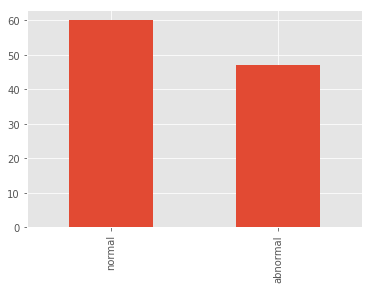

In [50]:
ckd['rbc'].value_counts().plot(kind='bar')

plt.show()

Display maximum blood pressure having Chronic Kidney Disease(CKD).

In [51]:
print(ckd['bp'].max())

180.0


Create a csv file of cleaned data in dataframe with name "clean_chronic_kidney_disease.csv"

In [ ]:
df.to_csv(path_or_buf="E:/DIH/python assg1 dataset/Updated Dataset/Dataset/clean_chronic_kidney_disease.csv")